In [1]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
#
# Cleveland and McGill: Graphical Perception, 1984
# Figure 12
#
# Weber's Law: differences in encoded numerical quantities
#

In [3]:
def create_rectangles(framed=False, size=(100,100)):
    '''
    '''
    image, A_y, B_y, A_height, B_height = draw_rectangles(framed, size)

    while (np.abs(A_y - B_y) < 10) or (np.abs(A_height - B_height) < 1):
        image, A_y, B_y, A_height, B_height = draw_rectangles(framed, size)        
    
    if A_height > B_height:
        label = 0
    elif A_height < B_height:
        label = 1
    
    return image, label
    

def draw_rectangles(framed, size):
    '''
    '''
    image = np.zeros(size, dtype=np.int8)
    
    max_height = 65
    delta = 5
    width = 20
    
    A_x = 20
    A_y = np.random.randint(size[0] - max_height)
    A_height = np.random.randint(max_height-delta, max_height)
    image[A_y:A_y+max_height,A_x:A_x+1] = 2
    image[A_y:A_y+max_height,A_x+width:A_x+width+1] = 2
    image[A_y:A_y+1,A_x:A_x+width] = 2
    image[A_y+max_height:A_y+max_height+1,A_x:A_x+width+1] = 2
    image[A_y+max_height-A_height:A_y+max_height+1,A_x:A_x+width+1] = 1
    
    B_x = 60
    B_y = np.random.randint(size[0] - max_height)
    B_height = np.random.randint(max_height-delta, max_height)
    image[B_y:B_y+max_height,B_x:B_x+1] = 2
    image[B_y:B_y+max_height,B_x+width:B_x+width+1] = 2
    image[B_y:B_y+1,B_x:B_x+width] = 2
    image[B_y+max_height:B_y+max_height+1,B_x:B_x+width+1] = 2    
    image[B_y+max_height-B_height:B_y+max_height+1,B_x:B_x+width+1] = 1    
    
    if not framed:
        image[image == 2] = 0
    
    return image, A_y, B_y, A_height, B_height


0


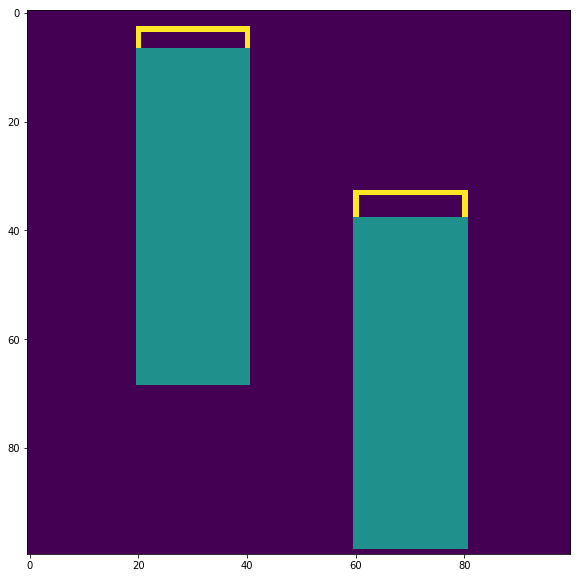

In [4]:
plt.figure(figsize=(10,10))
image, label = create_rectangles(True)
print label
imshow(image, interpolation='nearest')

In [5]:
#
# let's create a bunch of samples
#
N = 100

images = np.zeros((N, 100, 100), dtype=np.bool)
framed_images = np.zeros((N, 100, 100), dtype=np.bool)
labels = np.zeros((N), dtype=np.bool)

for n in range(N):
    
    framed_image, label = create_rectangles(True) # create framed image
    # remove frame
    image = framed_image.copy()
    image[image == 2] = 0
    images[n] = image.astype(np.bool)
    
    # harden frame
    framed_image[framed_image == 2] = 1
    framed_images[n] = framed_image.astype(np.bool)
    
    labels[n] = label
    

LABEL 0


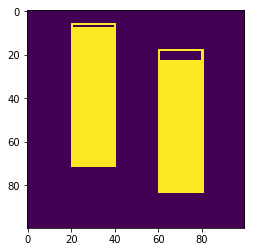

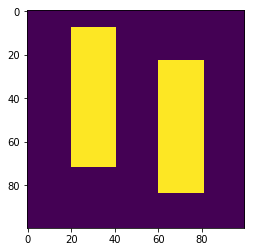

In [6]:
INDEX = 6
imshow(framed_images[INDEX])
plt.figure()
imshow(images[INDEX])
print 'LABEL', int(labels[INDEX])

In [7]:
#
# let's create a bunch of samples
#
N = 100000

t0 = time.time()

images = np.zeros((N, 100, 100), dtype=np.bool)
framed_images = np.zeros((N, 100, 100), dtype=np.bool)
labels = np.zeros((N), dtype=np.bool)

for n in range(N):
    
    framed_image, label = create_rectangles(True) # create framed image
    # remove frame
    image = framed_image.copy()
    image[image == 2] = 0
    images[n] = image.astype(np.bool)
    
    # harden frame
    framed_image[framed_image == 2] = 1
    framed_images[n] = framed_image.astype(np.bool)
    
    labels[n] = label
    
print 'Done after', time.time()-t0, 'seconds'
print 'Label 0', len(np.where(labels == 0)[0])
print 'Label 1', len(np.where(labels == 1)[0])

Done after 11.2108490467 seconds
Label 0 50073
Label 1 49927


LABEL 1


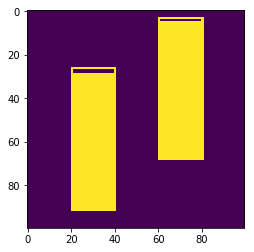

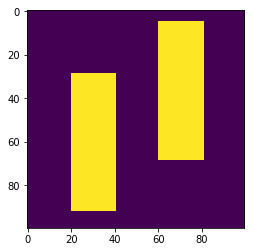

In [8]:
INDEX = 2
imshow(framed_images[INDEX])
plt.figure()
imshow(images[INDEX])
print 'LABEL', int(labels[INDEX])

In [9]:
#
# NN without frames
#
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(12, input_dim=100*100, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(images[0:80000].reshape(80000,100*100), labels[0:80000], epochs=10, validation_split=0.25)
model.evaluate(images[80000:].reshape(20000,100*100), labels[80000:])

Using TensorFlow backend.


Train on 60000 samples, validate on 20000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.6523 - acc: 0.6853 - val_loss: 0.5965 - val_acc: 0.8182
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.4981 - acc: 0.9057 - val_loss: 0.3807 - val_acc: 0.9609
Epoch 3/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.2683 - acc: 0.9863 - val_loss: 0.1763 - val_acc: 0.9996
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1282 - acc: 0.9997 - val_loss: 0.0916 - val_acc: 1.0000
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0715 - acc: 1.0000 - val_loss: 0.0563 - val_acc: 1.0000
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0452 - acc: 1.0000 - val_loss: 0.0372 - val_acc: 1.0000
Epoch 7/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0312 - acc: 1.0000 - val_loss: 0.0262 - 

[0.012521193953603507, 1.0]

In [10]:
#
# NN with frames
#
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(12, input_dim=100*100, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(framed_images[0:80000].reshape(80000,100*100), labels[0:80000], epochs=10, validation_split=0.25)
model.evaluate(framed_images[80000:].reshape(20000,100*100), labels[80000:])

Train on 60000 samples, validate on 20000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.6438 - acc: 0.6199 - val_loss: 0.5542 - val_acc: 0.9150
Epoch 2/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.4047 - acc: 0.9354 - val_loss: 0.2475 - val_acc: 0.9970
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1667 - acc: 0.9993 - val_loss: 0.1095 - val_acc: 1.0000
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0816 - acc: 1.0000 - val_loss: 0.0620 - val_acc: 1.0000
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0480 - acc: 1.0000 - val_loss: 0.0393 - val_acc: 1.0000
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0321 - acc: 1.0000 - val_loss: 0.0267 - val_acc: 1.0000
Epoch 7/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0231 - acc: 1.0000 - val_loss: 0.0199 - 

[0.010413902670890093, 1.0]